# testing perturbations in correllated uncertainty

In [227]:
import cantera as ct
import numpy as np
from torch.quasirandom import SobolEngine
from rmgpy.data.thermo import ThermoDatabase
from IPython.display import Image
import seaborn as sns

sns.set_palette('Dark2')

In [187]:
DELTA_E0_MAX_J_MOL = 30000
DELTA_E0_MAX_J_MOL_VDW = 20000

## sobol sequence testing

In [188]:
# Create the pseudo randoms
N = 5000
sobol = SobolEngine(dimension=80, scramble=True, seed=100)
x_sobol = sobol.draw(N)

### get perturbed values so we know we are applying them correctly

In [189]:
pert = 3
E_0_c = float(DELTA_E0_MAX_J_MOL - 2.0 * x_sobol[pert,0] * DELTA_E0_MAX_J_MOL)/9.6e4
E_0_o = float(DELTA_E0_MAX_J_MOL - 2.0 * x_sobol[pert,1] * DELTA_E0_MAX_J_MOL)/9.6e4
E_0_h = float(DELTA_E0_MAX_J_MOL - 2.0 * x_sobol[pert,2] * DELTA_E0_MAX_J_MOL)/9.6e4
E_0_vdw = float(DELTA_E0_MAX_J_MOL_VDW  - 2.0 * x_sobol[pert, 3] * DELTA_E0_MAX_J_MOL_VDW)/9.6e4
E_0_n = float(DELTA_E0_MAX_J_MOL - 2.0 * x_sobol[pert,4] * DELTA_E0_MAX_J_MOL)/9.6e4

print(f"C: {E_0_c}\nO: {E_0_o}\nH: {E_0_h}\nVdw: {E_0_vdw}\nN: {E_0_n}")

C: 0.08625526936848958
O: -0.29157967122395834
H: 0.0291429443359375
Vdw: 0.14007698567708332
N: 0.041631917317708336


### Pt Library base

In [190]:
rmg_thermo_pt111 = ThermoDatabase()
library_path = "/scratch/westgroup/methanol/perturb_5000_correllated/RMG-database/input/thermo/"
thermo_libraries = ["surfaceThermoPt111"]
rmg_thermo_pt111.load(
    library_path,
    libraries=thermo_libraries,
    depository=False,
    surface=True)
thermo_pt_base = rmg_thermo_pt111.libraries["surfaceThermoPt111"]

### Pt perturbed library

In [195]:
perturb = f"000{pert}"
rmg_thermo_pt111_0001 = ThermoDatabase()
library_path = f"/scratch/westgroup/methanol/perturb_5000_correllated/db_{perturb}/input/thermo/"
thermo_libraries = [f"surfaceThermoPt111"]

rmg_thermo_pt111_0001.load(
    library_path,
    libraries=thermo_libraries,
    depository=False,
    surface=True)
thermo_pt_0001 = rmg_thermo_pt111_0001.libraries[f"surfaceThermoPt111"]


In [192]:
thermo = thermo_pt_base

### compare Pt lib values

In [193]:
thermo_pt_base.entries

OrderedDict([('vacant', <Entry index=1 label="vacant">),
             ('H_ads', <Entry index=2 label="H_ads">),
             ('H2_ads', <Entry index=3 label="H2_ads">),
             ('H2O_ads', <Entry index=4 label="H2O_ads">),
             ('OH_ads', <Entry index=5 label="OH_ads">),
             ('HO-OH_ads', <Entry index=6 label="HO-OH_ads">),
             ('O2_ads', <Entry index=7 label="O2_ads">),
             ('OOH_ads', <Entry index=8 label="OOH_ads">),
             ('O_ads', <Entry index=9 label="O_ads">),
             ('O-NH2_ads', <Entry index=10 label="O-NH2_ads">),
             ('O-CH3_ads', <Entry index=11 label="O-CH3_ads">),
             ('NH3_ads', <Entry index=12 label="NH3_ads">),
             ('NH2_ads', <Entry index=13 label="NH2_ads">),
             ('NH_ads', <Entry index=14 label="NH_ads">),
             ('N_ads', <Entry index=15 label="N_ads">),
             ('H2N-OH_ads', <Entry index=16 label="H2N-OH_ads">),
             ('HN-O_ads', <Entry index=17 label="HN-O

#### vdw

In [196]:
species = "H2_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)
h2 = thermo_pt_0001.entries[species].data.get_enthalpy(298)

print("original in eV: ",(h1/9.6e4))
print("perturbed in eV: ",(h2/9.6e4))
print("perturbation in eV: ",(h2-h1)/9.6e4)

original in eV:  -0.06109337939279112
perturbed in eV:  0.07898356190421564
perturbation in eV:  0.14007694129700676


In [197]:
species = "H2O_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)
h2 = thermo_pt_0001.entries[species].data.get_enthalpy(298)

print("original in eV: ",(h1)/1e3)
print("perturbed in eV: ",(h2/9.6e4))
print("perturbation in eV: ",(h2-h1)/9.6e4)
vdw_perturb = (h2-h1)/9.6e4

original in eV:  -263.45573733153225
perturbed in eV:  -2.6042538106434168
perturbation in eV:  0.14007678656004402


same for vdw species

#### carbon

In [198]:
species = "CH_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)
h2 = thermo_pt_0001.entries[species].data.get_enthalpy(298)

print("perturbation in eV: ",(h2-h1)/9.6e4)

perturbation in eV:  0.08625542086173073


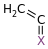

perturbation in eV:  0.08625498309107049


In [199]:
species = "C-CH2_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)
h2 = thermo_pt_0001.entries[species].data.get_enthalpy(298)

print("perturbation in eV: ",(h2-h1)/9.6e4)

c_perturb = (h2-h1)/9.6e4

same for carbon species

#### oxygen

In [224]:
species = "O_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)
h2 = thermo_pt_0001.entries[species].data.get_enthalpy(298)

print("perturbation in eV: ",(h2-h1)/9.6e4)
h1/9.6e4

perturbation in eV:  -0.2915761136760554


-1.4634416446064724

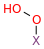

perturbation in eV:  -0.2915819416264606


In [201]:
species = "OOH_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)
h2 = thermo_pt_0001.entries[species].data.get_enthalpy(298)

print("perturbation in eV: ",(h2-h1)/9.6e4)

In [202]:
species = "O-CH3_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)
h2 = thermo_pt_0001.entries[species].data.get_enthalpy(298)

print("perturbation in eV: ",(h2-h1)/9.6e4)

o_perturb = (h2-h1)/9.6e4

perturbation in eV:  -0.29158034608942035


#### hydrogen (only one)

In [203]:
species = "H_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)
h2 = thermo_pt_0001.entries[species].data.get_enthalpy(298)

print("perturbation in eV: ",(h2-h1)/9.6e4)

perturbation in eV:  0.029143222787157773


### bidentates

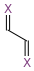

perturbation in eV:  0.1725101765223332


In [204]:
species = "CH-CH_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)
h2 = thermo_pt_0001.entries[species].data.get_enthalpy(298)

print("perturbation in eV: ",(h2-h1)/9.6e4)

In [205]:
c_perturb*2

0.17250996618214098

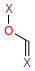

perturbation in eV:  -0.2053283180984017


In [206]:
species = "HCO-h_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)
h2 = thermo_pt_0001.entries[species].data.get_enthalpy(298)

print("perturbation in eV: ",(h2-h1)/9.6e4)

In [207]:
c_perturb+o_perturb

-0.20532536299834986

### test groups

In [208]:
rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries

OrderedDict([('R*', <Entry index=0 label="R*">),
             ('R*bidentate', <Entry index=1 label="R*bidentate">),
             ('C*C*', <Entry index=2 label="C*C*">),
             ('C-*C-*', <Entry index=3 label="C-*C-*">),
             ('C=*RC=*R', <Entry index=4 label="C=*RC=*R">),
             ('C-*R2C-*R2', <Entry index=5 label="C-*R2C-*R2">),
             ('C-*R2C=*R', <Entry index=6 label="C-*R2C=*R">),
             ('C-*RC=*', <Entry index=7 label="C-*RC=*">),
             ('C*N*', <Entry index=8 label="C*N*">),
             ('C-*R2N=*', <Entry index=9 label="C-*R2N=*">),
             ('C-*R2N-*R', <Entry index=10 label="C-*R2N-*R">),
             ('C=*N-*', <Entry index=11 label="C=*N-*">),
             ('C=*RN=*', <Entry index=12 label="C=*RN=*">),
             ('C=*RN-*R', <Entry index=13 label="C=*RN-*R">),
             ('C*O*', <Entry index=14 label="C*O*">),
             ('C=*RO-*', <Entry index=15 label="C=*RO-*">),
             ('C-*R2O-*', <Entry index=16 label="C-*R2

carbon

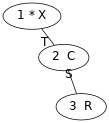

perturbation in eV:  0.08625141666666604
library perturbation, Carbon:  0.08625498309107049


In [209]:
species = "C#*R"
file = species + ".png"
with open(file, "wb") as img:
    img.write(rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries[species].item.draw('png'))
    
display((Image(filename=file)))

h1 = rmg_thermo_pt111.groups['adsorptionPt111'].entries[species].data.H298.value_si
h2 = rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries[species].data.H298.value_si

print("perturbation in eV: ",(h2-h1)/9.6e4)
print("library perturbation, Carbon: ", c_perturb)

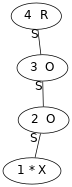

perturbation in eV:  -0.29158121666666675
library perturbation, Oxygen:  -0.29158034608942035


In [210]:
species = "O-*OR"
file = species + ".png"
with open(file, "wb") as img:
    img.write(rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries[species].item.draw('png'))
    
display((Image(filename=file)))

h1 = rmg_thermo_pt111.groups['adsorptionPt111'].entries[species].data.H298.value_si
h2 = rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries[species].data.H298.value_si

print("perturbation in eV: ",(h2-h1)/9.6e4)
print("library perturbation, Oxygen: ", o_perturb)

vdw

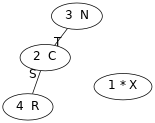

perturbation in eV:  0.1400768333333333
library perturbation, vdW:  0.14007678656004402


In [211]:
species = "(CRN)*"
file = species + ".png"
with open(file, "wb") as img:
    img.write(rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries[species].item.draw('png'))
    
display((Image(filename=file)))

h1 = rmg_thermo_pt111.groups['adsorptionPt111'].entries[species].data.H298.value_si
h2 = rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries[species].data.H298.value_si

print("perturbation in eV: ",(h2-h1)/9.6e4)
print("library perturbation, vdW: ", vdw_perturb)

bidentate

make sure we add perturbations per each bonded atom. probably not necessary since we don't have any in model

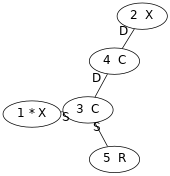

perturbation in eV:  0.1725028333333333
perturbation from each bound c 0.17250996618214098


In [212]:
species = "C-*RC=*"
file = species + ".png"
with open(file, "wb") as img:
    img.write(rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries[species].item.draw('png'))
    
display((Image(filename=file)))

h1 = rmg_thermo_pt111.groups['adsorptionPt111'].entries[species].data.H298.value_si
h2 = rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries[species].data.H298.value_si

print("perturbation in eV: ",(h2-h1)/9.6e4)
print("perturbation from each bound c", c_perturb*2)

averaged

make sure that R\*bidentate and R\*single_chemisorbed are averaged properly

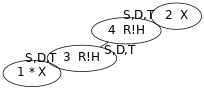

perturbation in eV:  0.15019688333333336
perturbation avg from C*3 and N in eV:  0.15019886271158853


In [213]:
species = "R*bidentate"
file = species + ".png"
with open(file, "wb") as img:
    img.write(rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries[species].item.draw('png'))
    
display((Image(filename=file)))

h1 = rmg_thermo_pt111.groups['adsorptionPt111'].entries[species].data.H298.value_si
h2 = rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries[species].data.H298.value_si

print("perturbation in eV: ",(h2-h1)/9.6e4)
print("perturbation avg from C*3 and N in eV: ",np.average([E_0_c, E_0_c,E_0_c,E_0_n])*2)

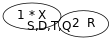

perturbation in eV:  -0.05456197499999992
perturbation avg from C*3 and N in eV:  -0.054564161512586806


In [214]:
species = "R*single_chemisorbed"
file = species + ".png"
with open(file, "wb") as img:
    img.write(rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries[species].item.draw('png'))
    
display((Image(filename=file)))

h1 = rmg_thermo_pt111.groups['adsorptionPt111'].entries[species].data.H298.value_si
h2 = rmg_thermo_pt111_0001.groups['adsorptionPt111'].entries[species].data.H298.value_si

print("perturbation in eV: ",(h2-h1)/9.6e4)
print("perturbation avg from C*3 and N in eV: ",np.average([E_0_c, E_0_o,E_0_n]))

## load the cantera file and ensure that perturbation for species match what we expect

In [216]:
cantera_file = f"/scratch/westgroup/methanol/perturb_5000_correllated/run_{perturb}/cantera/chem_annotated.cti"
gas = ct.Solution(cantera_file)
surf = ct.Interface(cantera_file, "surface1", [gas])

enthalpies are in j/kmol in cantera, multiply by kmol/1e3 mol and divide by 9.6e4 J/eV

In [217]:
species = "OH_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)/9.6e4
h2 = surf.species("OH*(12)").thermo.h(298)/1e3/9.6e4

print("perturbation in eV: ",(h2-h1))

perturbation in eV:  -0.4906320454502888


In [ ]:
BE_o_pt = -3.81153
Be_o_cu = -4.20764


In [226]:
species = "O_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)/9.6e4
h2 = surf.species("O*(11)").thermo.h(298)/1e3/9.6e4

print("perturbation in eV: ",(h2-h1))
h2

perturbation in eV:  -0.6896849306244632


-2.1531265752309356

In [219]:
species = "H2O_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)/9.6e4
h2 = surf.species("H2O*(13)").thermo.h(298)/1e3/9.6e4

print("original in eV: ",h1)
print("final in eV:    ",h2)
print("perturbation in eV: ",(h2-h1))

original in eV:  -2.7443305972034606
final in eV:     -2.6042507092028155
perturbation in eV:  0.14007988800064508


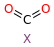

original in eV:  -4.048153380761086
final in eV:     -3.908074920091563
perturbation in eV:  0.1400784606695229


In [220]:
species = "CO2_ads"
file = species + ".png"
thermo.entries[species].item.draw(file)
display((Image(filename=file)))

h1 = thermo_pt_base.entries[species].data.get_enthalpy(298)/9.6e4
h2 = surf.species("CO2*(15)").thermo.h(298)/1e3/9.6e4

print("original in eV: ",h1)
print("final in eV:    ",h2)
print("perturbation in eV: ",(h2-h1))

In [221]:
E_0_vdw

0.14007698567708332

In [134]:
surf.species_names

['X(1)',
 'H*(10)',
 'O*(11)',
 'OH*(12)',
 'H2O*(13)',
 'CO*(14)',
 'CO2*(15)',
 'HCO*(16)',
 'HCOO*(17)',
 'COOH*(18)',
 'HCOOH*(19)',
 'CH2O*(20)',
 'CH3O*(21)',
 'CH3O2*(22)',
 'CH3OH*(23)',
 'H2X(25)']